## Best Practices for Data Preprocessing

#### Always Explore & Visualize Data First

Summary Statistics:
              age         sex         bmi          bp          s1          s2  \
count  395.000000  396.000000  396.000000  402.000000  399.000000  402.000000   
mean     0.000426    0.001816   -0.001037    0.000667    0.001131    0.000669   
std      0.047752    0.047706    0.046460    0.047636    0.047742    0.048293   
min     -0.107226   -0.044642   -0.090275   -0.112399   -0.104765   -0.115613   
25%     -0.034575   -0.044642   -0.035307   -0.033213   -0.033216   -0.030358   
50%      0.005383   -0.044642   -0.007823   -0.005670   -0.004321   -0.003819   
75%      0.038076    0.050680    0.030440    0.035644    0.030078    0.030940   
max      0.110727    0.050680    0.170555    0.132044    0.153914    0.198788   

               s3          s4          s5          s6  
count  390.000000  388.000000  388.000000  387.000000  
mean    -0.000406   -0.001024    0.000346   -0.001131  
std      0.046145    0.047994    0.048213    0.047508  
min     -0.102307   -0.076

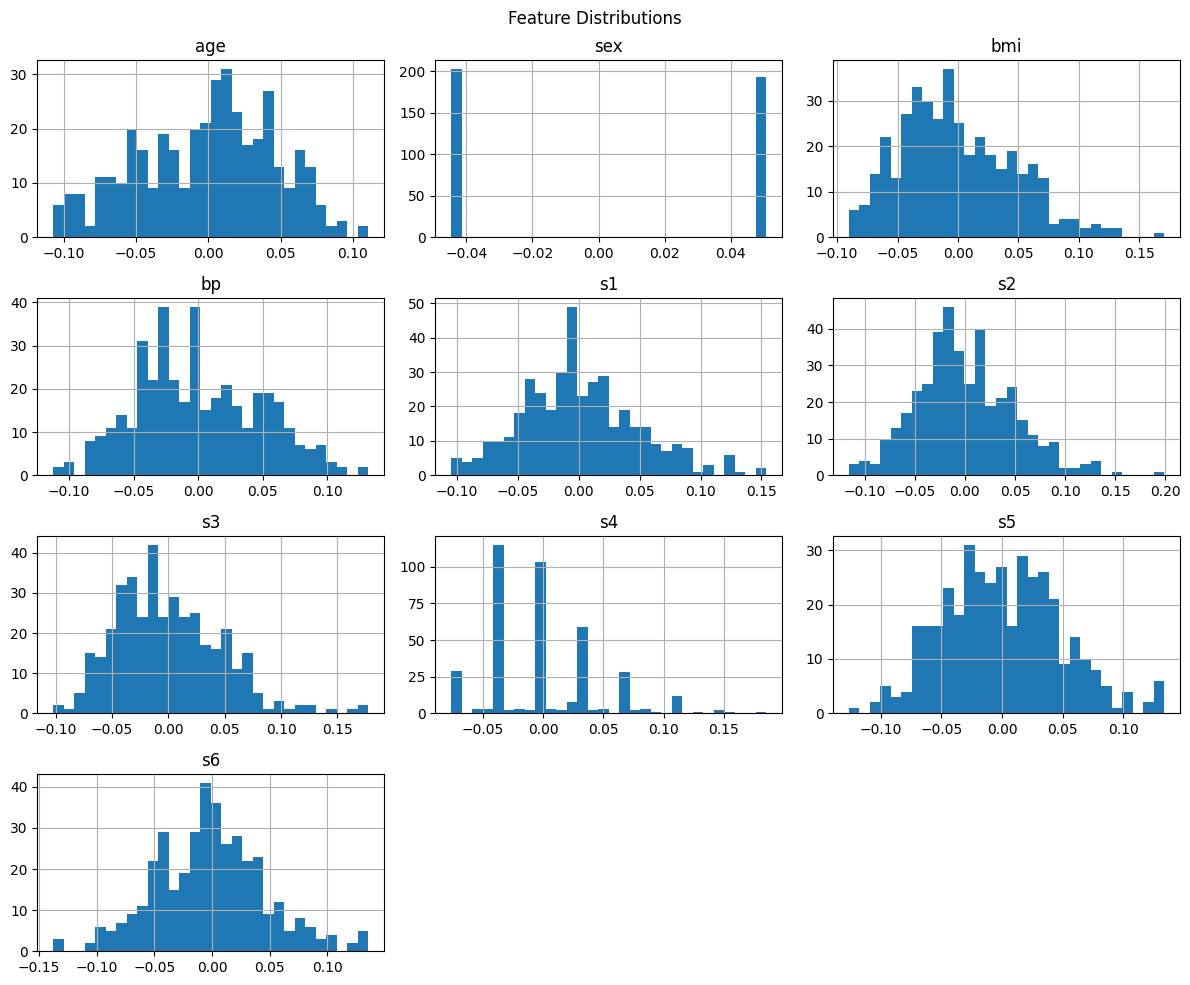

Missing values per column:
 age    47
sex    46
bmi    46
bp     40
s1     43
s2     40
s3     52
s4     54
s5     54
s6     55
dtype: int64
Shape after dropping missing: (136, 10)
Missing values filled using mean imputation.

Logged Preprocessing Steps:
- Generated summary statistics.
- Plotted histograms for data distribution.
- Checked for null values in the dataset.
- Dropped rows with missing values.
- Filled missing values with mean imputation.
- Applied outlier capping at 1st and 99th percentiles.
- Applied Min-Max scaling.
- Applied Robust scaling.
- Applied MaxAbs scaling.

Saved transformation parameters to 'transformation_parameters.json'


In [1]:
# Task 1: Summary Statistics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler
import json

# Load dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Simulate missing values
rng = np.random.RandomState(42)
mask = rng.rand(*X.shape) < 0.1
X[mask] = np.nan

log_steps = []

# ------------------------------------------
# # Task 1: Summary Statistics
# ------------------------------------------

print("Summary Statistics:")
print(X.describe())
log_steps.append("Generated summary statistics.")

# ------------------------------------------
# # Task 2: Visualize Data Distribution
# ------------------------------------------

X.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()
log_steps.append("Plotted histograms for data distribution.")

# ------------------------------------------
# # Task 3: Checking for Null Values
# ------------------------------------------

null_counts = X.isnull().sum()
print("Missing values per column:\n", null_counts)
log_steps.append("Checked for null values in the dataset.")

# ------------------------------------------
# Handle Missing & Inconsistent Data
# # Task 4: Drop Missing Values
# ------------------------------------------

X_dropped = X.dropna()
print(f"Shape after dropping missing: {X_dropped.shape}")
log_steps.append("Dropped rows with missing values.")

# ------------------------------------------
# # Task 5: Fill Missing Values
# ------------------------------------------

imputer = SimpleImputer(strategy='mean')
X_filled = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
print("Missing values filled using mean imputation.")
log_steps.append("Filled missing values with mean imputation.")

# ------------------------------------------
# # Task 6: Handling Outliers with Capping
# ------------------------------------------

def cap_outliers(df, lower_percentile=0.01, upper_percentile=0.99):
    df_capped = df.copy()
    for col in df.columns:
        low = df[col].quantile(lower_percentile)
        high = df[col].quantile(upper_percentile)
        df_capped[col] = np.clip(df[col], low, high)
    return df_capped

X_capped = cap_outliers(X_filled)
log_steps.append("Applied outlier capping at 1st and 99th percentiles.")

# ------------------------------------------
# Choose the Right Scaling Method
# # Task 7: Min-Max Scaling
# ------------------------------------------

scaler_minmax = MinMaxScaler()
X_minmax = pd.DataFrame(scaler_minmax.fit_transform(X_capped), columns=X.columns)
log_steps.append("Applied Min-Max scaling.")

# ------------------------------------------
# # Task 8: Robust Scaling
# ------------------------------------------

scaler_robust = RobustScaler()
X_robust = pd.DataFrame(scaler_robust.fit_transform(X_capped), columns=X.columns)
log_steps.append("Applied Robust scaling.")

# ------------------------------------------
# # Task 9: MaxAbs Scaling
# ------------------------------------------

scaler_maxabs = MaxAbsScaler()
X_maxabs = pd.DataFrame(scaler_maxabs.fit_transform(X_capped), columns=X.columns)
log_steps.append("Applied MaxAbs scaling.")

# ------------------------------------------
# Keep Track of Data Transformations
# # Task 10: Log Data Preprocessing Steps
# ------------------------------------------

print("\nLogged Preprocessing Steps:")
for step in log_steps:
    print("-", step)

# ------------------------------------------
# # Task 11: Store Transformation Parameters
# ------------------------------------------

params = {
    'imputer_statistics': imputer.statistics_.tolist(),
    'minmax_min': scaler_minmax.data_min_.tolist(),
    'minmax_max': scaler_minmax.data_max_.tolist(),
    'robust_center': scaler_robust.center_.tolist(),
    'robust_scale': scaler_robust.scale_.tolist(),
    'maxabs_max': scaler_maxabs.max_abs_.tolist()
}

with open('transformation_parameters.json', 'w') as f:
    json.dump(params, f)

print("\nSaved transformation parameters to 'transformation_parameters.json'")



# Task 2: Visualize Data Distribution





# Task 3: Checking for Null Values




## Handle Missing & Inconsistent Data Before Applying ML Models

In [ ]:
# Task 4: Drop Missing Values





# Task 5: Fill Missing Values




# Task 6: Handling Outliers with Capping





## Choose the Right Scaling Method

In [ ]:
# Task 7: Min-Max Scaling







# Task 8: Robust Scaling






# Task 9: MaxAbs Scaling






## Keep Track of Data Transformations for Reproducibility

In [ ]:
# Task 10: Log Data Preprocessing Steps






# Task 11: Store Transformation Parameters




